In [53]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [54]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stealthtechnologies/predict-people-personality-types")

print("Path to dataset files:", path)

Path to dataset files: /home/egorl/.cache/kagglehub/datasets/stealthtechnologies/predict-people-personality-types/versions/2


In [55]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [56]:
!ls /home/egorl/.cache/kagglehub/datasets/stealthtechnologies/predict-people-personality-types/versions/2

data.csv


In [57]:
df = pd.read_csv(path + "/data.csv")
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


<div style="min-height: 80px;"><div class="sc-ezTrPE cWBTpb sc-hrmQvm eTbITn"><h2>Description</h2>
<p>This synthetic dataset is designed to explore and predict Myers-Briggs Type Indicator (MBTI) personality types based on a combination of demographic factors, interest areas, and personality scores. It includes 100K+ samples, each representing an individual with various features that contribute to determining their MBTI type. The dataset can be used to study correlations between different personality dimensions and external factors such as age, gender, education, and interests.</p>
<h2>Feature Descriptions</h2>
<p><strong>Age:</strong> A continuous variable representing the age of the individual.</p>
<p><strong>Gender:</strong> A categorical variable indicating the gender of the individual. Possible values are 'Male' and 'Female'.</p>
<p><strong>Education:</strong> A binary variable, A value of 1 indicates the individual has at least a graduate-level education (or higher), and 0 indicates an undergraduate, high school level or Uneducated.</p>
<p><strong>Interest:</strong> A categorical variable representing the individual's primary area of interest.</p>
<p><strong>Introversion Score:</strong> A continuous variable ranging from 0 to 10, representing the individual's tendency toward introversion versus extraversion. Higher scores indicate a greater tendency toward extraversion.</p>
<p><strong>Sensing Score:</strong> A continuous variable ranging from 0 to 10, representing the individual's preference for sensing versus intuition. Higher scores indicate a preference for sensing.</p>
<p><strong>Thinking Score:</strong> A continuous variable ranging from 0 to 10, indicating the individual's preference for thinking versus feeling. Higher scores indicate a preference for thinking.</p>
<p><strong>Judging Score:</strong> A continuous variable ranging from 0 to 10, representing the individual's preference for judging versus perceiving. Higher scores indicate a preference for judging.</p>
<p><strong>Personality:</strong> Target that contains People Personality Type</p></div></div>

# Анализ

Обратим внимание на ряд числовых показателей:

*   `year` - год выпуска
*   `IMDb` - рейтинг на самом большо агрегаторе фильмов
*   `Runtime` - продолжительность фильмов

Средний рейтинг фильмов на `IMDb` - $5.9$, что достаточно близко к значению 50% квантиля, представляющего собой медиану выборки. Отдельно стоит проверить выборку рейтингов на нормальность.

Средняя продолжительность фильмов $93.4$ минуты, что также близко к медиане. Это значение совпадает и с теоретическим - $90$ минут это минимальное время, которое необходимо для просмотра фильмов в кино. Также интересно проверить длительность на нормальность. 

А вот среднее и медиана (50% квантиль) года выпуска не совпадают достаточно заметно. Это скорее всего связано с тем, что поток фильмов год к году в целом расёт, тогда как первые фильмы выпускались очень давно и тянут "среднее" вниз. Это требует отдельного исследования. 



In [58]:
df.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


In [59]:
df.isna().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

In [60]:
df.shape

(128061, 9)

## Проверка рейтинга на нормальное распределение

### Визуальный анализ (гистограммы)

Построим гистограммы интеерсующих нас признаков, а также наложим поверх гистограм то, как бы выглядело нормальное распределение с параметрами, рассчитанными на основе выборок.

Мы можем видеть, что серьёзные выводы можно соделать только относительно распределения параметра `year` - оно распределено точно не нормально. 



In [31]:
# df["AgeLog"] = np.log(df["Age"])

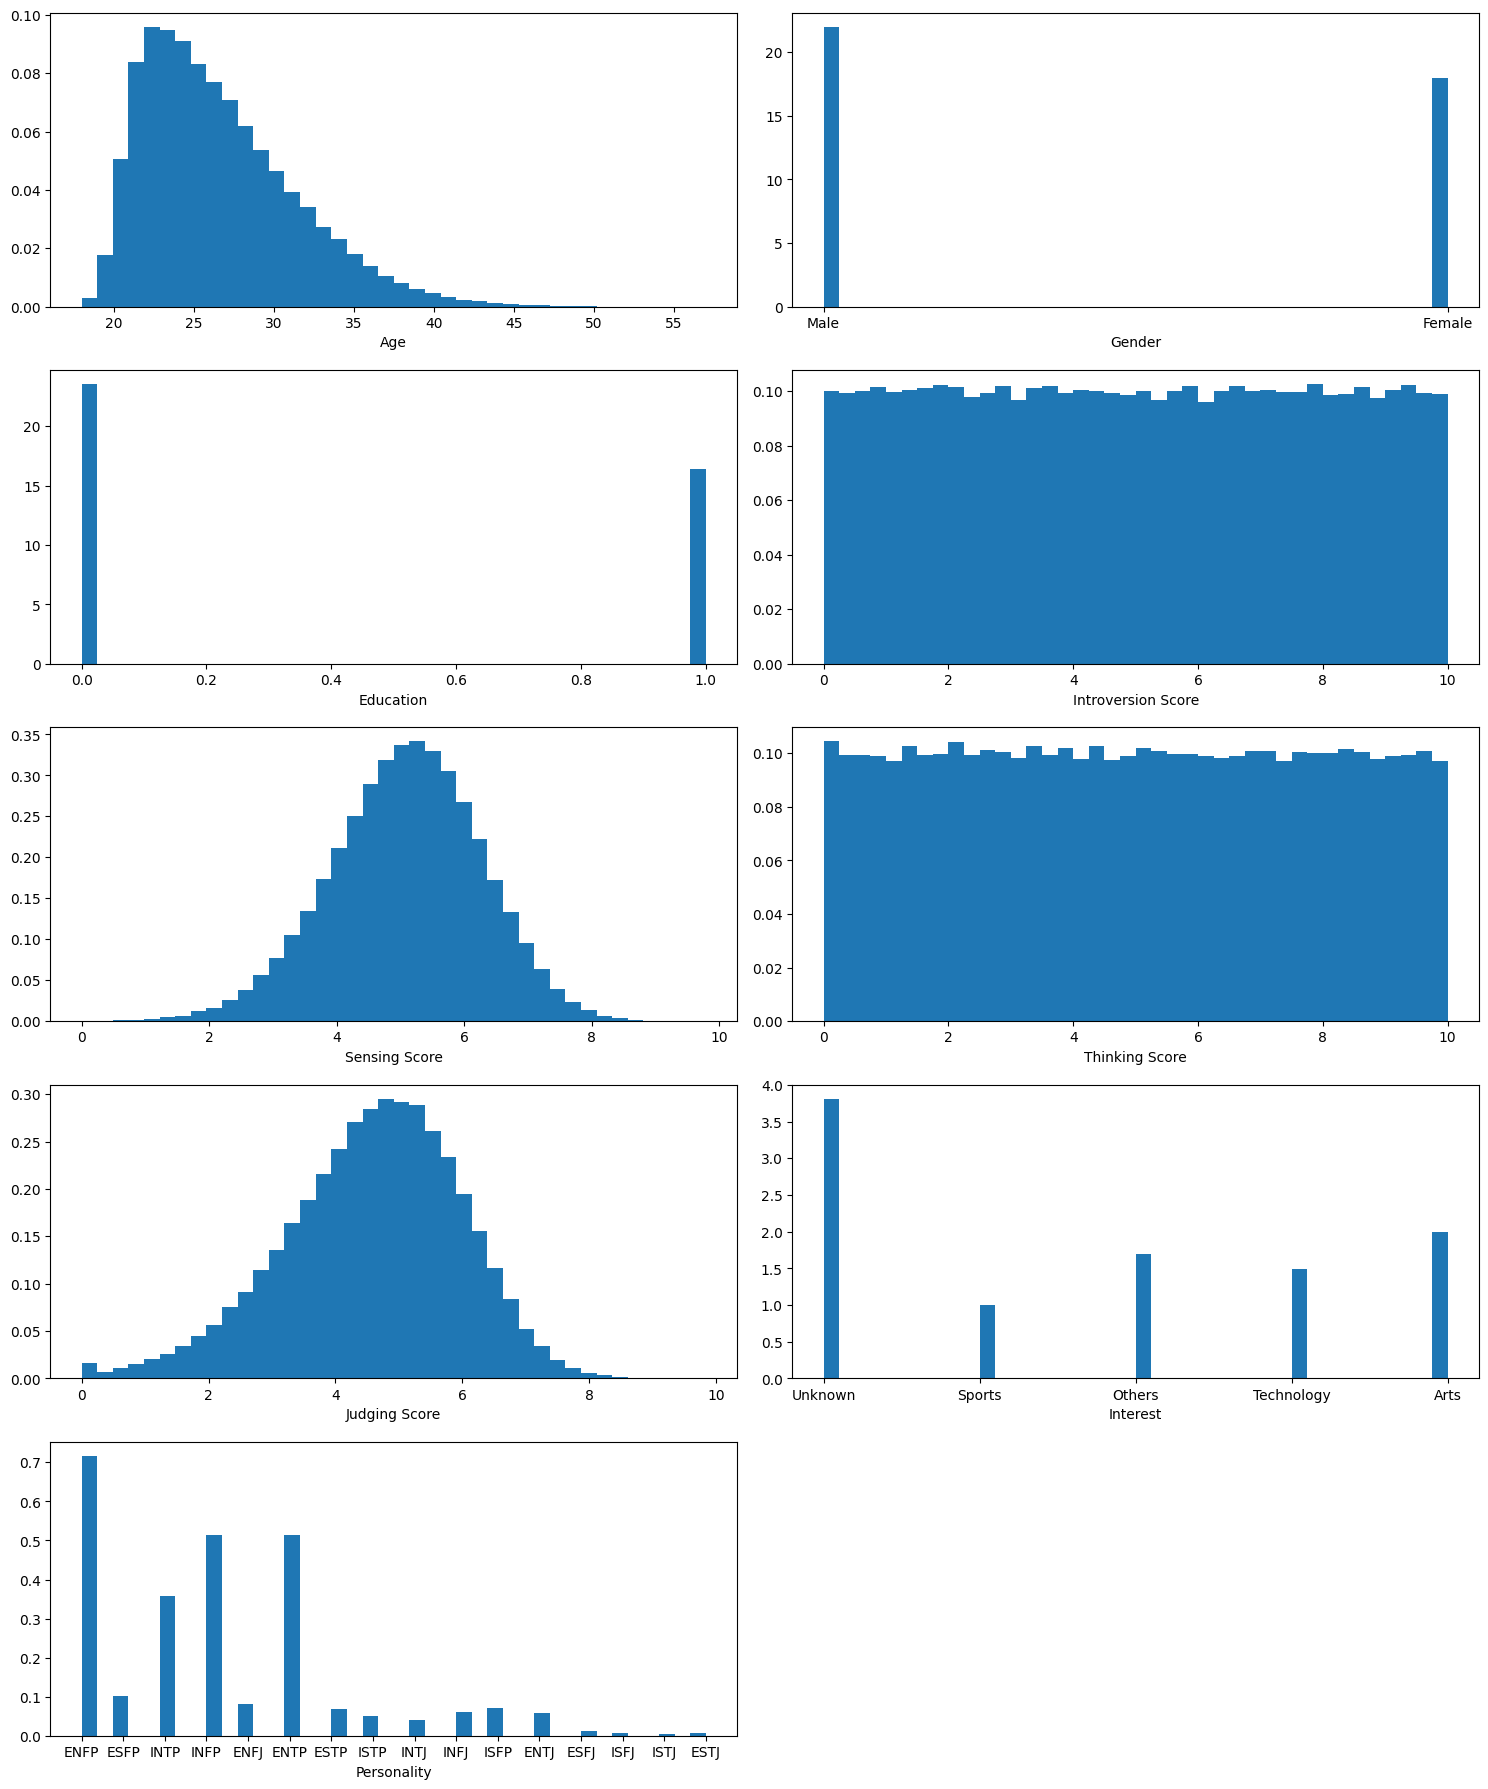

In [61]:
# keys = df.select_dtypes(include=['number']).columns
keys = df.columns

plt.figure(figsize=(15,18))
for i, key in enumerate(keys):
    plt.subplot(5,2,i + 1)
    plt.hist(df[key], density=True, bins=40)
    plt.xlabel(key)
    

plt.tight_layout()
plt.show()

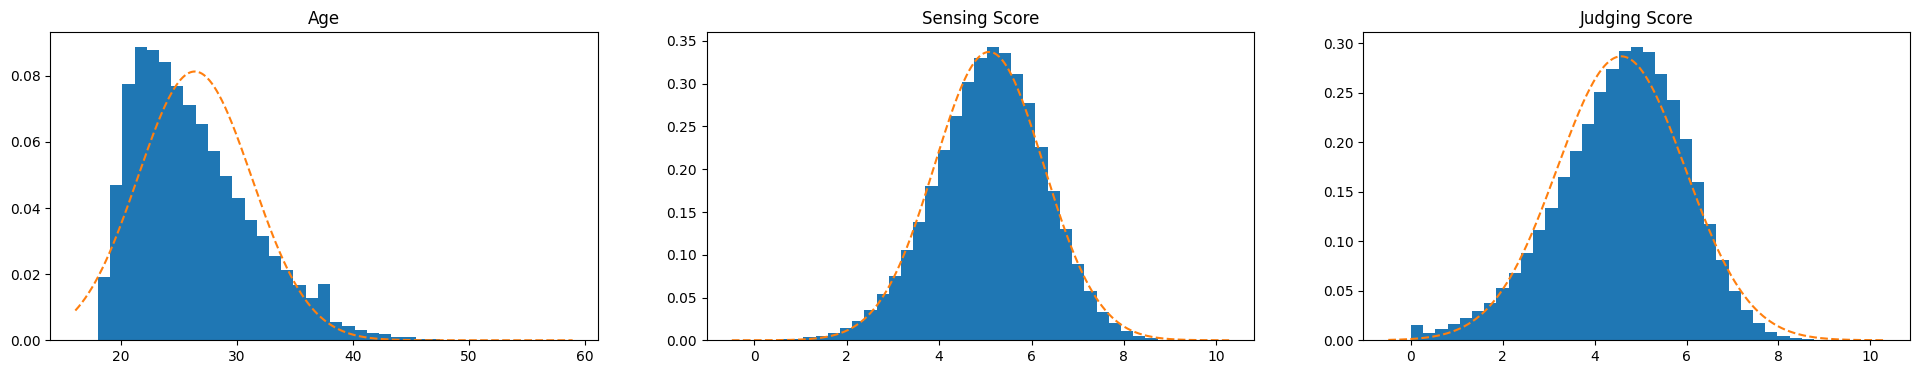

In [62]:
keys = ['Age', 'Sensing Score', 'Judging Score']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=37)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 5000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

### Визуальный анализ (квантили)

Построим Q-Q кривую. Это график, который показывает соответствие между теоретическим значением квантиля на выборке и его реальным значением. 

Чем ближке график к графику $y=x$, тем более нормальным является распределение значений выборки. 

Как мы и говорили ранее `year` не является распределённым нормально. Тогда как `runtime`, `IMDb` распределён относительно нормально.

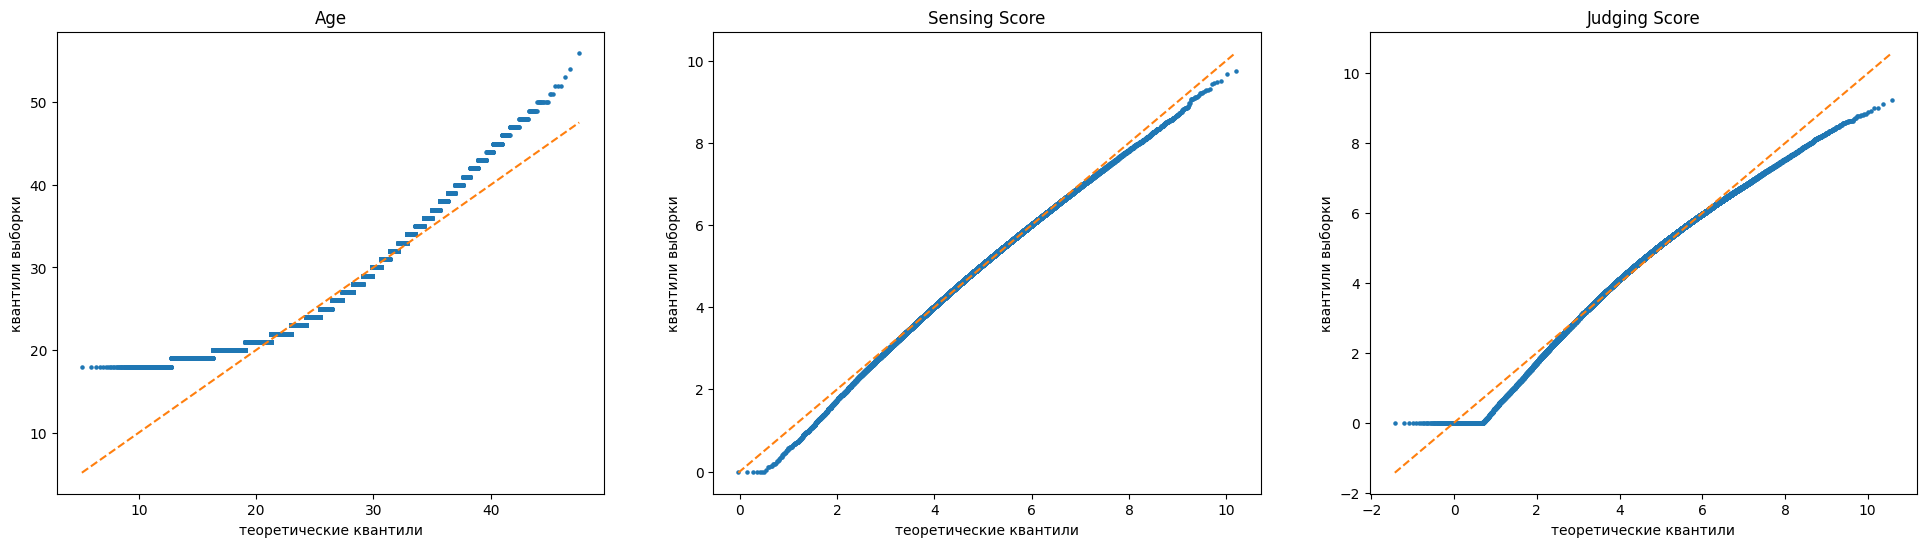

In [34]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 6)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

### Стастические показатели для выборок

Оценим нормальность выборок также  на основании известных характеристик нормального распределения. В частности:
* Вероятность попасть в интервал от $\mu - \sigma$ до $\mu + \sigma$ равна $0.68$,
* В интервал от $\mu - 2\sigma$ до $\mu + 2\sigma$ — $0.95$,
* В интервал от $\mu - 3\sigma$ до $\mu + 3\sigma$ — $0.997$.

Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными. 

На основании такой оценки `IMDb` сильно ближе к нормально распределению, чем `runtime`, что достаточно логично. Короткие фильмы не снимают. 

Тот факт, что распределения данных значений явлются нормальными или близкими к ним позволяет использовать другие методы для анализа взаимосвязей в данных.

In [63]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

Age
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6960823357618635
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9609014454049242
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9924332935085624

Sensing Score
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6862432746894058
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9547481278453237
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9963689179375453

Judging Score
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6891325227821117
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.954349880135248
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9948540148835321



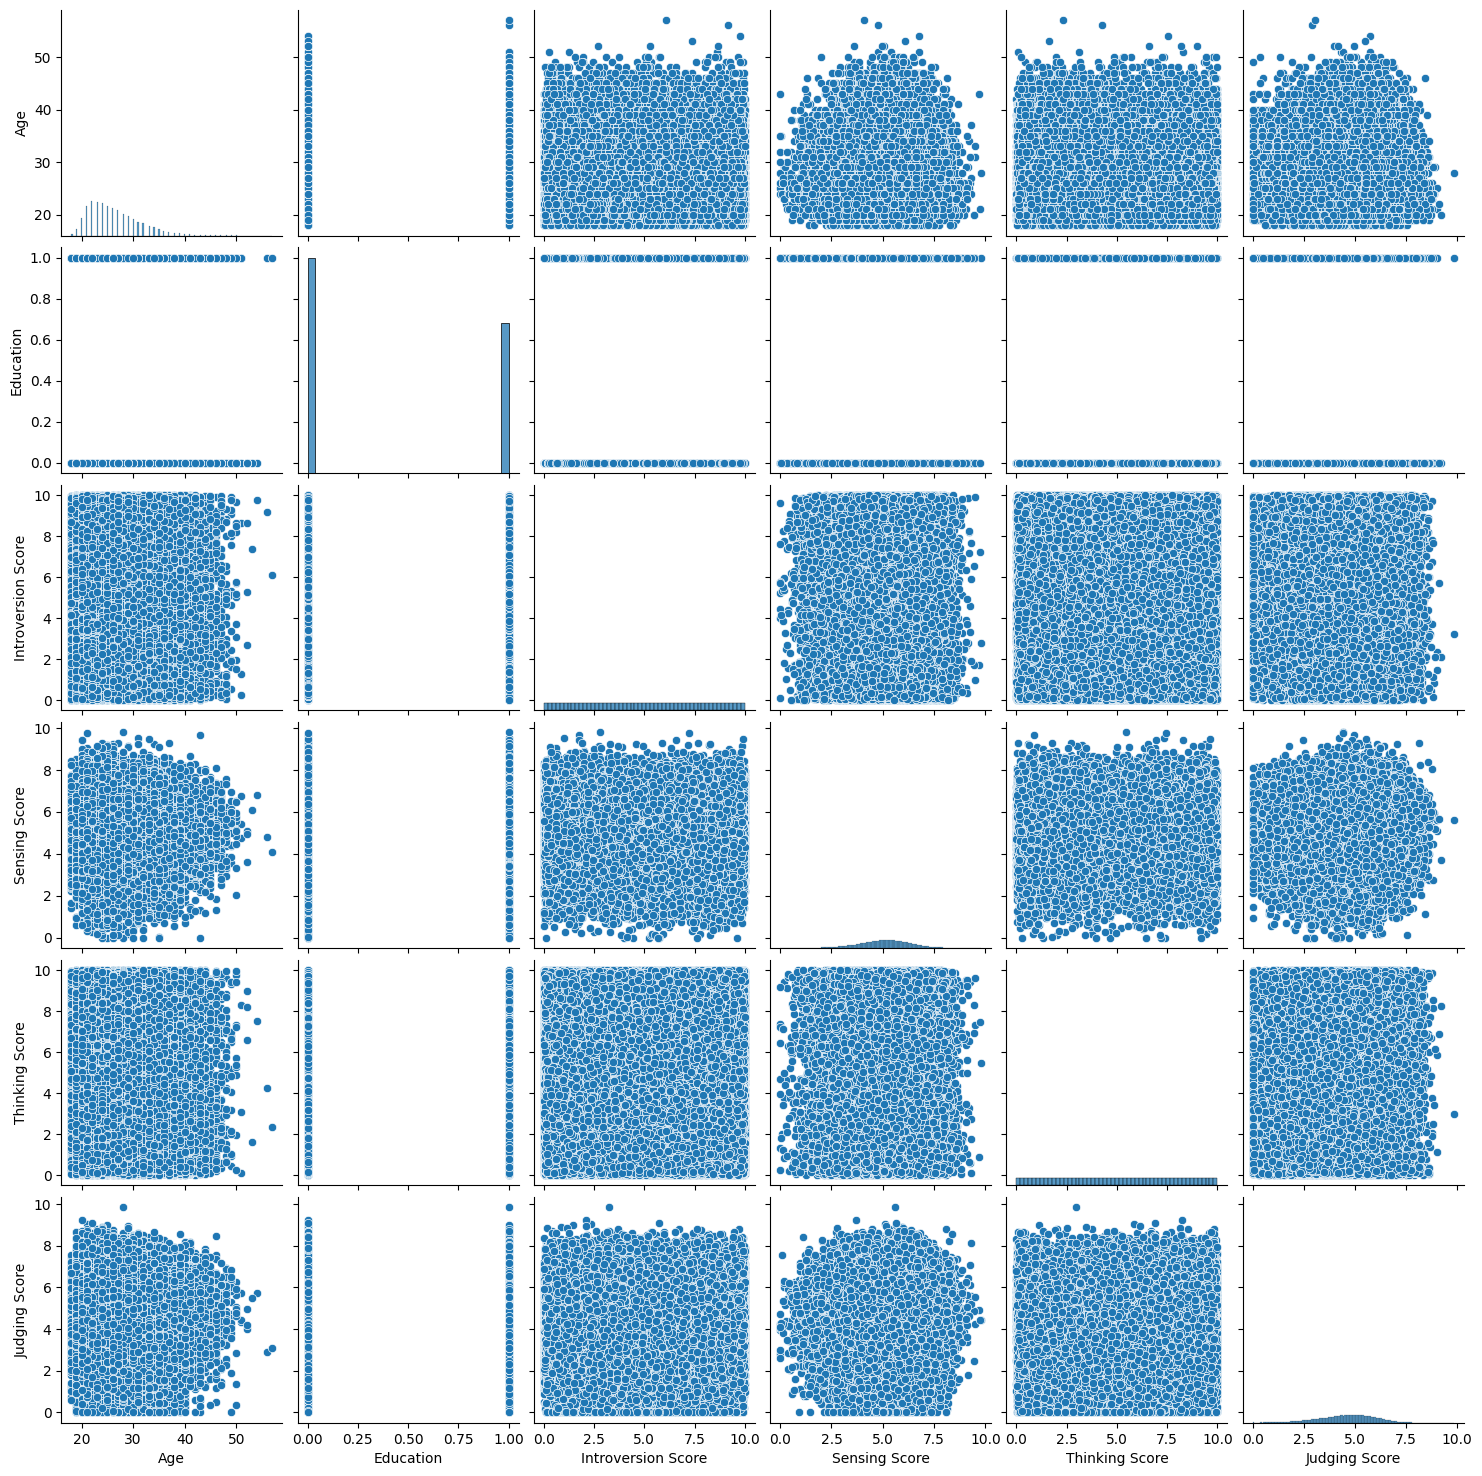

In [36]:
sns.pairplot(df)

<Axes: >

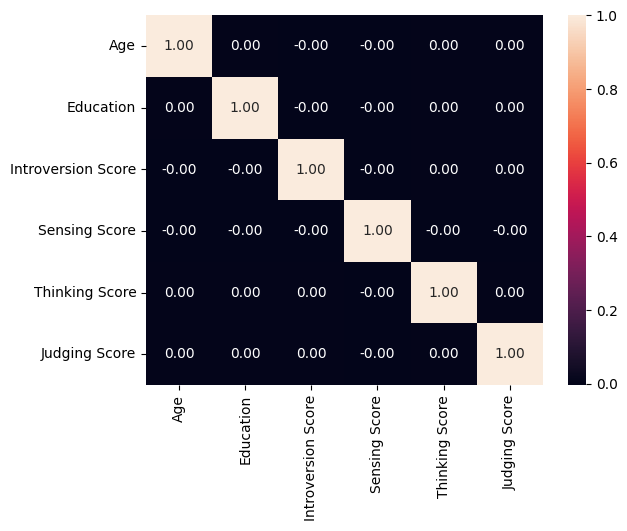

In [64]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f")

## Регрессия между длительностью и оценкой, есть ли?

### Визуализация 

На графике тяжело с ходу понять, есть ли какие-то явные зависимости. Визуально кажется, что разброс оценок коротких фильмов меньше, чем длинных. Вполне может быть, что фильмы надо разделять по длительности на те, которые показывают в кино и те, которые не показывают в кино (<90 минут)

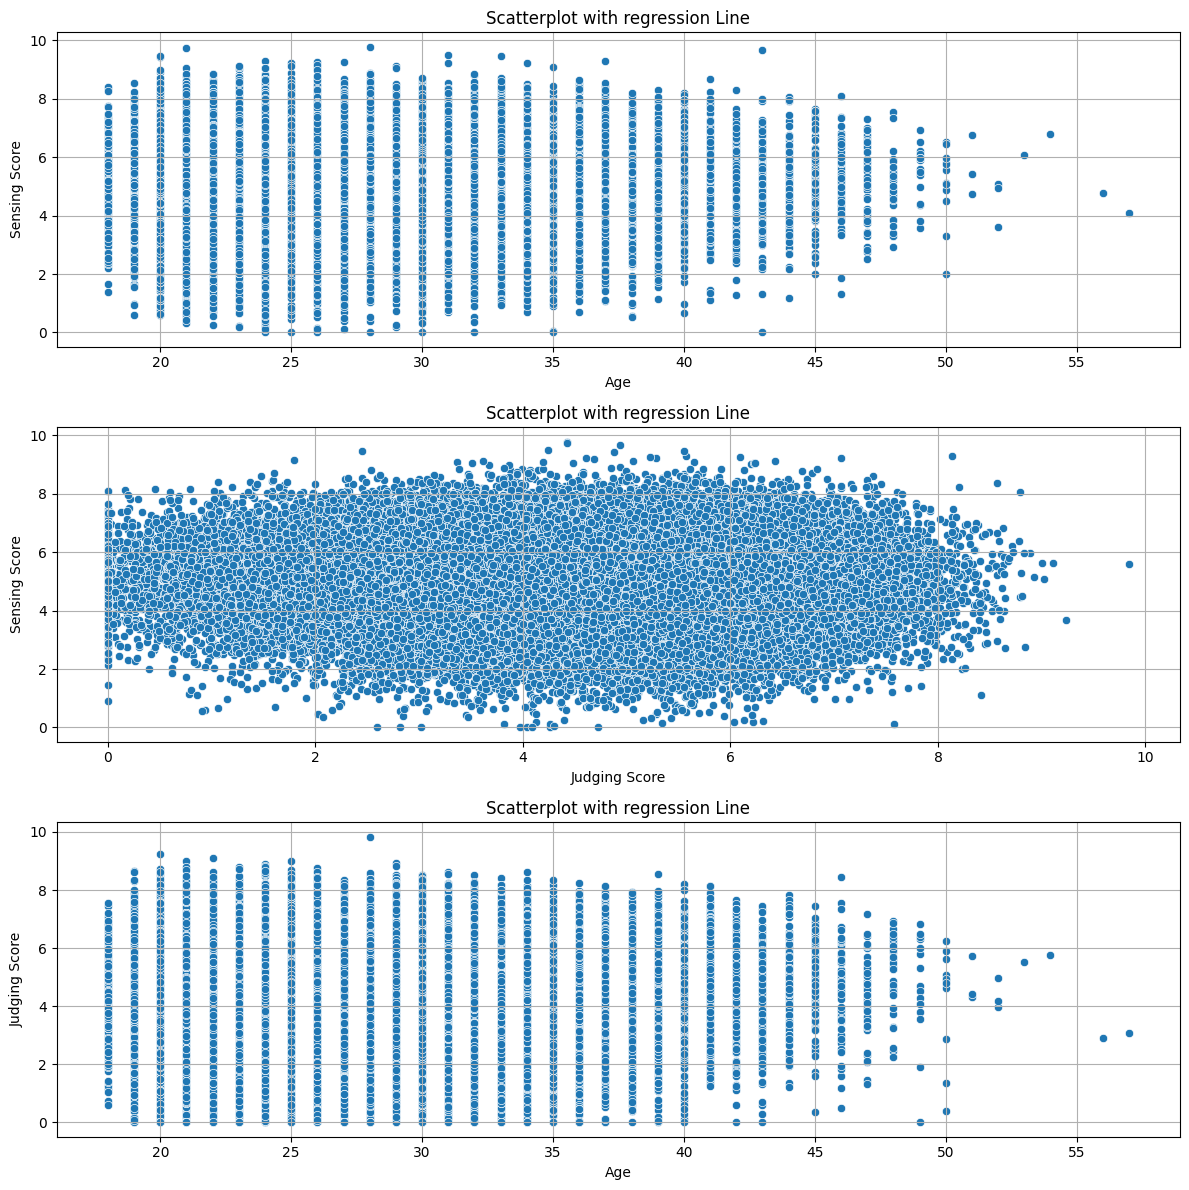

In [85]:
# "Age", 'Sensing Score', 'Judging Score
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
# sns.regplot(x='Age', y='Sensing Score', data=df[["Age", 'Sensing Score']], scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
sns.scatterplot(x='Age', y='Sensing Score', data=df[["Age", 'Sensing Score']])
plt.title('Scatterplot with regression Line')
plt.xlabel('Age')
plt.ylabel('Sensing Score')
plt.grid(True)

plt.subplot(3,1,2)
# sns.regplot(x='Judging Score', y='Sensing Score', data=df[["Judging Score", 'Sensing Score']], scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
sns.scatterplot(x='Judging Score', y='Sensing Score', data=df[["Judging Score", 'Sensing Score']])
plt.title('Scatterplot with regression Line')
plt.xlabel('Judging Score')
plt.ylabel('Sensing Score')
plt.grid(True)

plt.subplot(3,1,3)
# sns.regplot(x='Age', y='Judging Score', data=df[["Age", 'Judging Score']], scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
sns.scatterplot(x='Age', y='Judging Score', data=df[["Age", 'Judging Score']])
plt.title('Scatterplot with regression Line')
plt.xlabel('Age')
plt.ylabel('Judging Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [66]:
df.shape

(128061, 9)

### Рассчёт регрессии и проверка значимости

Рассчитыаем коэффициенты регрессии и изначения для для каждого из значений выборок. Результат расчёт показывает, что регрессия плохо описывает зависимость между данными и корее всего зависимости нет.

In [86]:
ones = np.ones((128061,1))
x_pot = np.hstack((ones, df['Age'].values.reshape(-1, 1)))

In [87]:
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['Sensing Score'])
z = x_pot.dot(b)
e = df['Sensing Score'] - z

In [88]:
R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['Sensing Score']))
R

1.0458307360239338e-05

### Статистический тест

Построим статистический тест с нулевой гипотезой о том, что зависимости между Age и Sensing Score.

In [70]:
n = 128061
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 128059)

In [71]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.841531438038816

In [72]:
F = (R / k1) / ((1 - R) / k2)
F

1.3392943889972555

Так как результат расчёта $F < t$, то отклоняем гипотезу, что зависимость есть.

### Рассчёт регрессии и проверка значимости

Рассчитыаем коэффициенты регрессии и изначения для для каждого из значений выборок. Результат расчёт показывает, что регрессия плохо описывает зависимость между данными и корее всего зависимости нет.

In [95]:
ones = np.ones((128061,1))
x_pot = np.hstack((ones, df['Age'].values.reshape(-1, 1)))

In [96]:
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['Judging Score'])
z = x_pot.dot(b)
e = df['Judging Score'] - z

In [97]:
R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['Judging Score']))
R

1.6993472617965466e-07

### Статистический тест

Построим статистический тест с нулевой гипотезой о том, что зависимости между Age и Sensing Score.

In [98]:
n = 128061
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 128059)

In [99]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.841531438038816

In [100]:
F = (R / k1) / ((1 - R) / k2)
F

0.021761674797904643

Так как результат расчёта $F < t$, то отклоняем гипотезу, что зависимость есть.

### Рассчёт регрессии и проверка значимости

Рассчитыаем коэффициенты регрессии и изначения для для каждого из значений выборок. Результат расчёт показывает, что регрессия плохо описывает зависимость между данными и cкорее всего зависимости нет.

In [101]:
ones = np.ones((128061,1))
x_pot = np.hstack((ones, df['Judging Score'].values.reshape(-1, 1)))

In [102]:
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['Sensing Score'])
z = x_pot.dot(b)
e = df['Sensing Score'] - z

In [103]:
R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['Sensing Score']))
R

3.5308740984341114e-06

### Статистический тест

Построим статистический тест с нулевой гипотезой о том, что зависимости между Age и Sensing Score.

In [104]:
n = 128061
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 128059)

In [105]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.841531438038816

In [106]:
F = (R / k1) / ((1 - R) / k2)
F

0.4521618026977713

Так как результат расчёта $F < t$, то отклоняем гипотезу, что зависимость есть.

## Верно ли, что гендер влияет на какую-то из характеристик?

Проведём дисперсионный анализ для средний значени оценок по выборке. Так как $F < t$, то можно точно сказать, что характеристики действительно зависят от пола.

In [73]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.05

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t

In [74]:
df1 = df[df["Gender"] == 'Male']
df2 = df[df['Gender'] != 'Male']

In [75]:
checks = ["Age", 'Sensing Score', 'Judging Score']

In [76]:
for check in checks:
    res1_mean = df1[check].mean()
    res2_mean = df2[check].mean()
    print("H_0 hypothesis accept:", var_analise(df, df1, df2, check))
    print(f'{check} male: {res1_mean}, female {res2_mean}')

H_0 hypothesis accept: False
Age male: 26.34118014538846, female 26.3587603463534
H_0 hypothesis accept: False
Sensing Score male: 5.081660615520426, female 5.082176055335926
H_0 hypothesis accept: False
Judging Score male: 4.578469376355389, female 4.578076831068389


Предположительно из-за синтетического создания данных не удастся найти каких-то закономерностей связанных с гендерами, которые убрали намеренно.

NYPD disproportionately cited people of color for ‘jaywalking’ in 2023, mirroring racist enforcement nationwide.

About 92 percent of all citations issued last year by New York City police for crossing the middle of the street or against a light.

## Верно ли, что возраст влияет на какую-то из характеристик?

In [78]:
df1 = df[df["Age"] > 25]
df2 = df[df["Age"] <= 25]

In [79]:
checks = ['Sensing Score', 'Judging Score']

In [81]:
for check in checks:
    res1_mean = df1[check].mean()
    res2_mean = df2[check].mean()
    print("H_0 hypothesis accept:", var_analise(df, df1, df2, check))
    print(f'{check} 25<: {res1_mean}, 25>= {res2_mean}')

H_0 hypothesis accept: False
Sensing Score 25<: 5.080115159199366, 25>= 5.083621759976716
H_0 hypothesis accept: False
Judging Score 25<: 4.578502522579369, 25>= 4.57808862153126


## Верно ли, что фильмы только на английском оценивают иначе, чем фильмы с другими языками?

Так как  F>t , то можно точно сказать, что длительно действительно зависит от наличия переводов. Переводимые фильмы в среднем длинее.

In [ ]:
var_analise(df, df1, df2, 'Runtime')

True

In [ ]:
res1_mean = df1['Runtime'].mean()
res2_mean = df2['Runtime'].mean()

In [ ]:
print(f'Only english: {res1_mean}, with translation {res2_mean}')

Only english: 87.39821069928793, with translation 104.33863165169316


## А оценки фильмов, представленных на netflix и не представленных отличаются?

Да, статистически отличаются. 

```
# Выбран кодовый формат
```



In [ ]:
df1 = df[df['Netflix'] == 1]
df2 = df[df['Netflix'] != 1]

In [ ]:
var_analise(df, df1, df2, 'IMDb')

True

In [ ]:
res1_mean = df1['IMDb'].mean()
res2_mean = df2['IMDb'].mean()

In [ ]:
print(f'Netflix: {res1_mean}, not netflix {res2_mean}')

Netflix: 6.247893258426924, not netflix 5.818070095585029


## Влияют ли жанры на оценку?

Проведём анализ зависимости оценки от качественного фактора "жанр". Для этого разобъём нашу таблицу на дамми переменные по жанрам. Построим ради интереса матрицу корелляции. 

Затем проведём дисперсиоанный анализ для всех пар выборок и построим график разброса результата. Можно однозначно сказать, что в большинстве случае жанр влияет на оценку (красные точки), и в меньшестве случаев (синие точки) жанр статистически на оценку не влияет. 

In [ ]:
seperated_genres = df['Genres'].str.get_dummies(',')
dataset_with_genres = pd.concat([df, seperated_genres], axis = 1, sort = False)

In [ ]:
list_of_genres = seperated_genres.columns

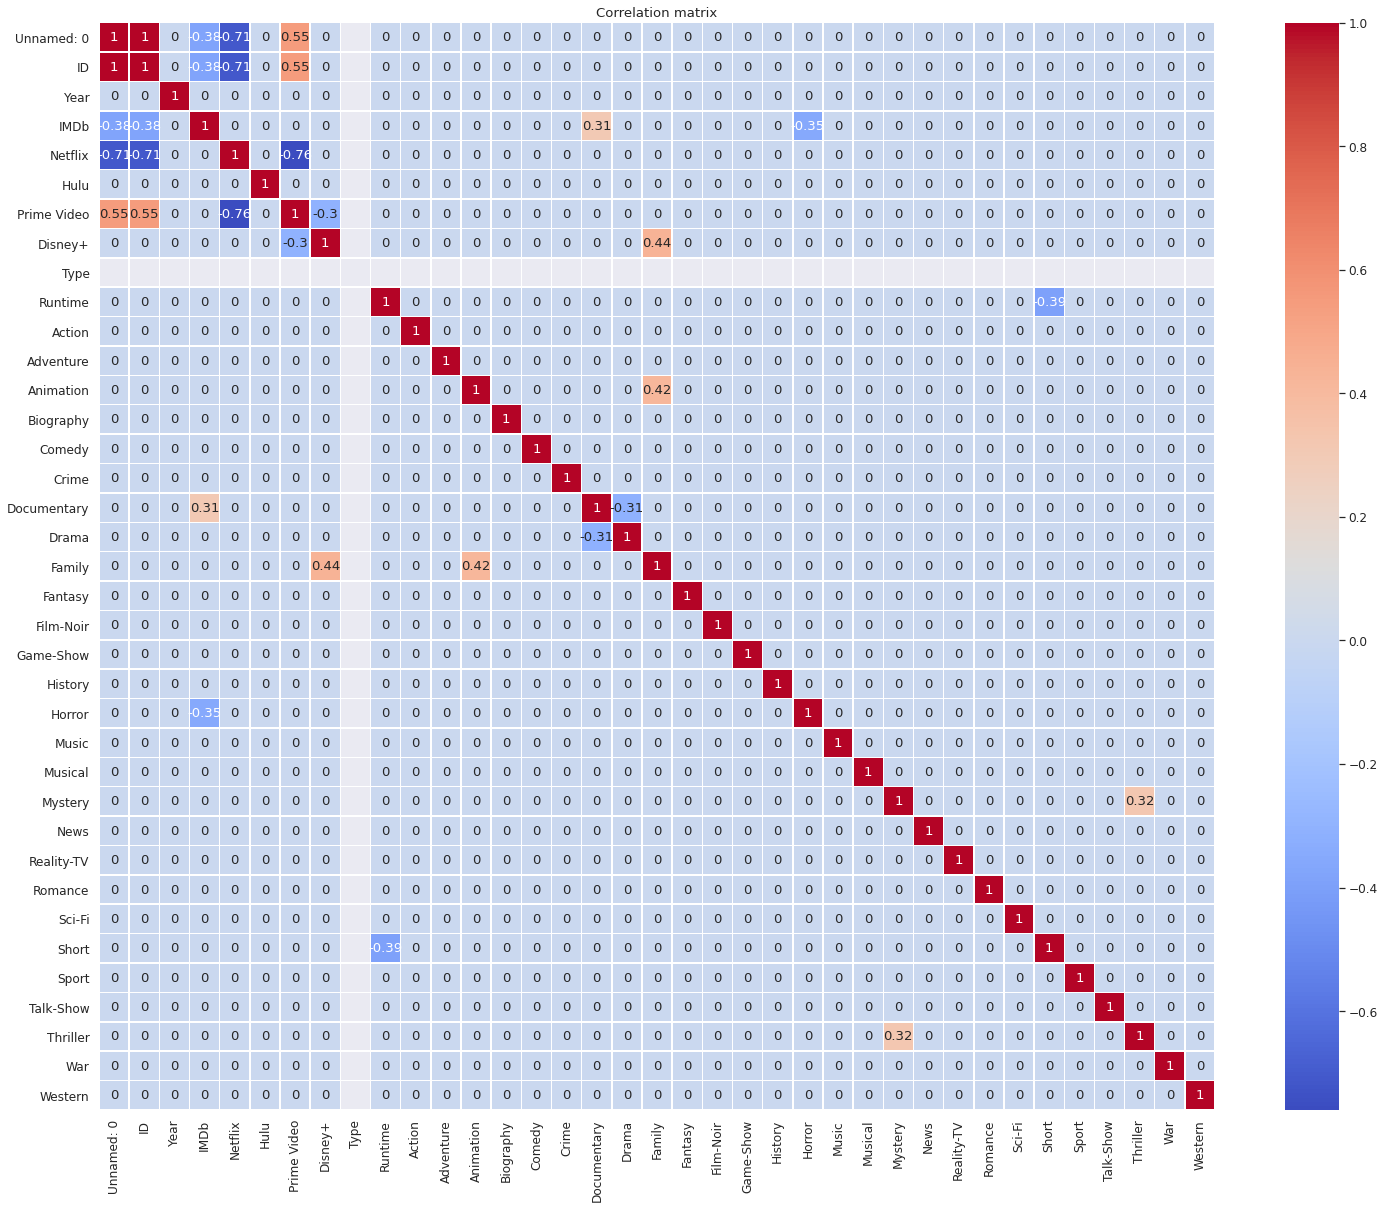

In [ ]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.1)

corr_matrix = dataset_with_genres.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0  # Отсекаем маленьеи корелляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [ ]:
list_of_res = []
for i in combinations(list_of_genres, 2):
  #print(i)
  dict = {}
  dict['g1'] = i[0]
  dict['g2'] = i[1]
  wdf = dataset_with_genres[[i[0], i[1], 'IMDb']]
  wdf = wdf.loc[ (wdf[i[0]]==1) | (wdf[i[1]]==1) ]
  wdf1 = wdf[wdf[i[0]]==1]
  wdf2 = wdf[wdf[i[1]]==1]
  
  dict['va'] = var_analise(wdf, wdf1, wdf2, 'IMDb')
  dict['g1_mean'] = wdf1['IMDb'].mean()
  dict['g2_mean'] = wdf2['IMDb'].mean()
  list_of_res.append(dict)

In [ ]:
resframe3 = pd.DataFrame(list_of_res)
resframe3[resframe3['va'] == False]

,g1,g2,va,g1_mean,g2_mean
10,Action,Game-Show,False,5.455725,6.128571
17,Action,Reality-TV,False,5.455725,5.668182
22,Action,Talk-Show,False,5.455725,5.900000
33,Adventure,Fantasy,False,5.621497,5.691185
35,Adventure,Game-Show,False,5.621497,6.128571
...,...,...,...,...,...
337,Short,Talk-Show,False,6.402332,5.900000
341,Sport,Talk-Show,False,6.408416,5.900000
345,Talk-Show,Thriller,False,5.900000,5.360763
346,Talk-Show,War,False,5.900000,6.246753


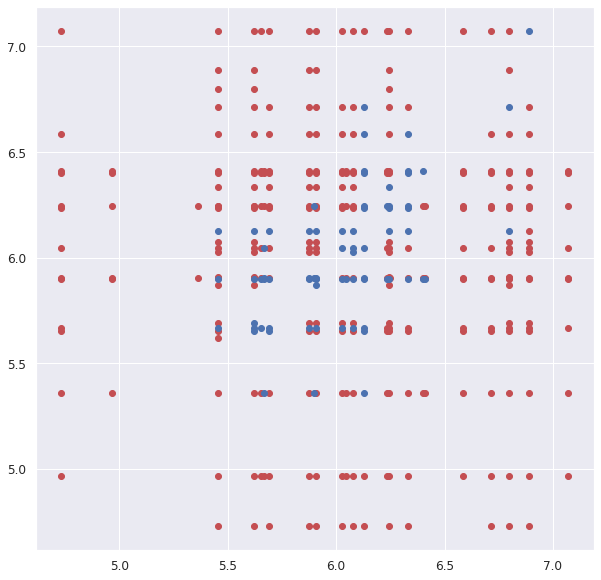

In [ ]:
plt.figure(figsize = (10,10))

plt.scatter(resframe3.loc[resframe3['va'] == True, 'g1_mean'], resframe3.loc[resframe3['va'] == True, 'g2_mean'], color = 'r')
plt.scatter(resframe3.loc[resframe3['va'] == False, 'g1_mean'], resframe3.loc[resframe3['va'] == False, 'g2_mean'], color = 'b')

# Выводы

Как бы нам не хотелось обратного, подвоха внутри нет. Рейтинг на IMDb распределён нормально, как и длительность фильмов. Это позволяет провести дисперсионный анализ различных закономерностей и выявить, что в США много плохих фильмов, которые даже не переводят на другие языки.

Эти фильмы статистически значимо оценивают хуже, чем тем, что переводятся на иные языки. То есть не всё, что делают в знаменитом Голливдуе идёт на экспорт, хотя нам так казалось. 

Интересно и то, что фильмы разных жанров в 80% случаев имеют разные оценки. Высокая оценка для хорора будет отличаться от высокой оценки для экшена. 

Ну и фильмы на netflix - действительно лучше общей массы. Элитная площадка. 

